In [1]:
from bigdl.util.common import *
from image import *
import cv2
import numpy as np
from IPython.display import Image, display
JavaCreator.set_creator_class("com.intel.analytics.zoo.transform.vision.pythonapi.PythonVisionTransform")
init_engine()

## Utils to read and display image

In [6]:
test_image = '/home/jxy/data/testdata/test/000019.jpg'

def create_image_feature(path):
    image = cv2.imread(path)
    return ImageFeature(image)
    
def transform_display(transformer, image_feature):
    out = transformer.transform(image_feature)
    cv2.imwrite('/tmp/tmp.jpg', out.get_image(to_chw=False))
    display(Image(filename='/tmp/tmp.jpg'))

## ColorJitter

creating: createImageFeature
creating: createColorJitter


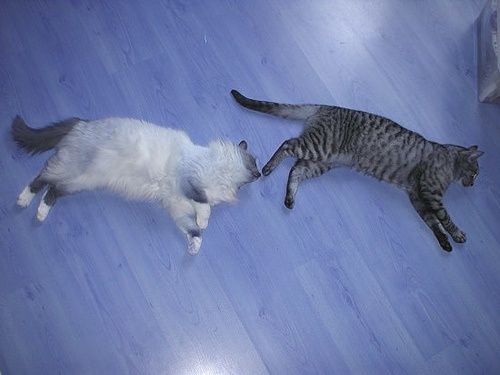

In [8]:
image_feature = create_image_feature(test_image)
color = ColorJitter(random_order_prob=1.0, shuffle=True)
transform_display(color, image_feature)

## Resize

creating: createImageFeature
creating: createResize


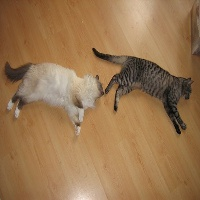

In [9]:
image_feature = create_image_feature(test_image)
resize = Resize(200, 200, 1)
transform_display(resize, image_feature)

## Crop

creating: createImageFeature
creating: createFixedCrop


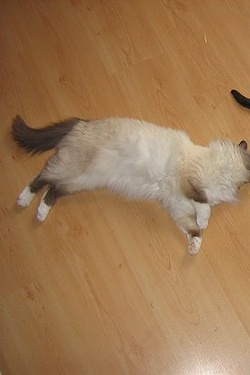

creating: createImageFeature
creating: createFixedCrop


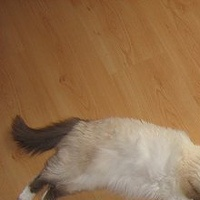

In [10]:
# Normalized Roi
image_feature = create_image_feature(test_image)
crop = FixedCrop(0.0, 0.0, 0.5, 1.0)
transform_display(crop, image_feature)

# Non-normalized Roi
image_feature = create_image_feature(test_image)
crop = FixedCrop(0.0, 0.0, 200.0, 200., False)
transform_display(crop, image_feature)

## CenterCrop

creating: createImageFeature
creating: createCenterCrop


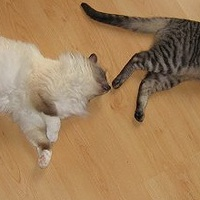

In [12]:
image_feature = create_image_feature(test_image)
crop = CenterCrop(200, 200)
transform_display(crop, image_feature)

## Random Crop

creating: createImageFeature
creating: createRandomCrop


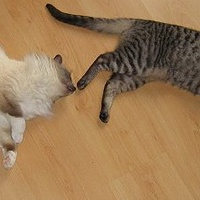

In [13]:
image_feature = create_image_feature(test_image)
crop = RandomCrop(200, 200)
transform_display(crop, image_feature)

## Expand

creating: createImageFeature
creating: createExpand


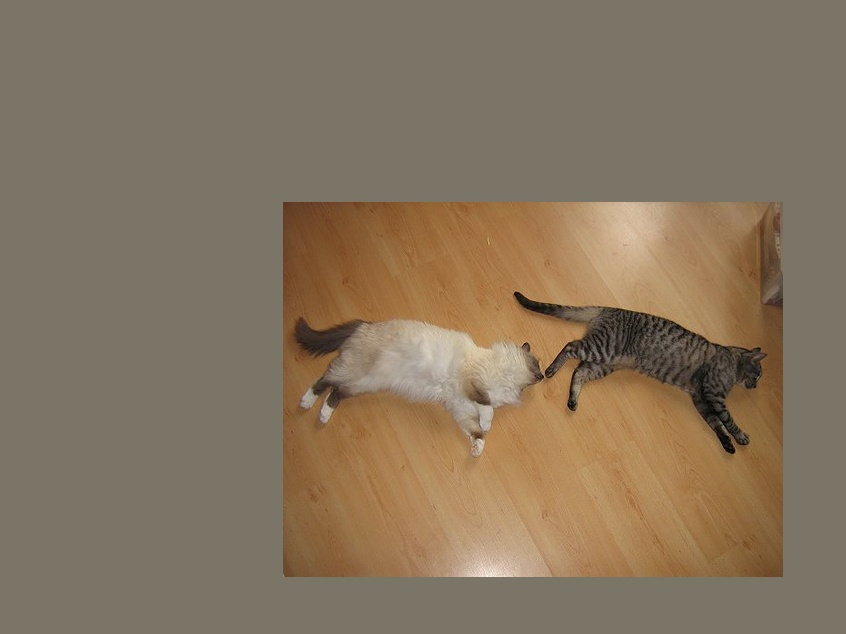

In [14]:
image_feature = create_image_feature(test_image)
expand = Expand(means_r=123, means_g=117, means_b=104,
                 max_expand_ratio=2.0)
transform_display(expand, image_feature)

## Horizontal Flip

creating: createImageFeature
creating: createHFlip


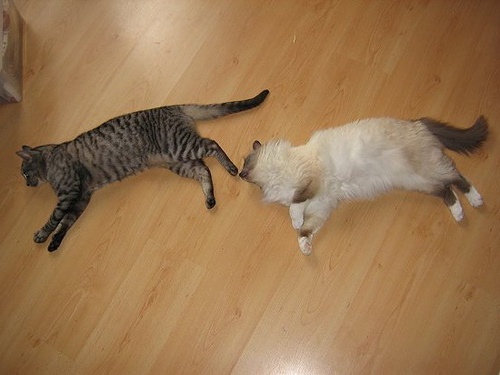

In [15]:
image_feature = create_image_feature(test_image)
transformer = HFlip()
transform_display(transformer, image_feature)

## Create a pipeline of transformer
Apply pipeline to image feature

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createPipeline
creating: createImageFeature


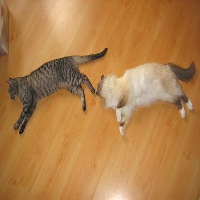

In [17]:
transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1)])
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

## Random transformer with probability 0.5

creating: createHFlip
creating: createRandomTransformer
creating: createImageFeature


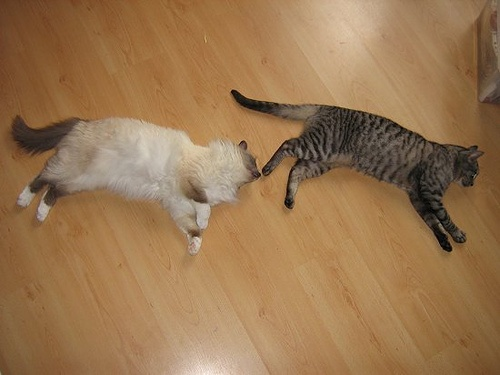

In [18]:
transformer = RandomTransformer(HFlip(), 0.5)
image_feature = create_image_feature(test_image)
transform_display(transformer, image_feature)

## ImageFeature to_sample, get_image, get_label

In [20]:
image_feature = create_image_feature(test_image)
print image_feature
print image_feature.to_sample()
print image_feature.get_image()
print image_feature.get_label()

creating: createImageFeature
com.intel.analytics.zoo.transform.vision.image.ImageFeature@6b1c214a
Sample: features: [JTensor: storage: [  33.   32.   34. ...,  107.  107.  108.], shape: [  3 375 500], float], label: JTensor: storage: [-1.], shape: [1], float,
[[[  33.   32.   34. ...,   79.   79.   80.]
  [  33.   32.   34. ...,   78.   79.   82.]
  [  34.   33.   34. ...,   78.   78.   81.]
  ..., 
  [  82.   47.   43. ...,   42.   42.   42.]
  [ 102.   58.   46. ...,   43.   43.   43.]
  [ 112.   66.   48. ...,   41.   41.   42.]]

 [[  56.   55.   57. ...,  102.   99.  100.]
  [  56.   55.   57. ...,  100.   99.  102.]
  [  57.   56.   57. ...,  100.   98.  101.]
  ..., 
  [ 115.   79.   74. ...,   75.   75.   75.]
  [ 133.   91.   77. ...,   76.   76.   76.]
  [ 144.   97.   79. ...,   74.   74.   75.]]

 [[  94.   93.   95. ...,  118.  117.  118.]
  [  94.   93.   95. ...,  118.  117.  120.]
  [  95.   94.   95. ...,  118.  116.  119.]
  ..., 
  [ 131.   98.   97. ...,  108.  108.

In [22]:
folder = "/home/jxy/data/testdata/test"

transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats()])

image_frame = ImageFrame.read(folder, sc)

# apply transformer to image_frame
image_frame = transformer(image_frame)

# image_frame to sample
sample_rdd = image_frame.to_sample()
print sample_rdd.take(1)

# get label rdd
label_rdd = image_frame.get_label()
print 'label ', label_rdd.take(1)

# get image rdd
image_rdd = image_frame.get_image()
print image_rdd.take(1)

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createPipeline
[Sample: features: [JTensor: storage: [ 103.  100.   66. ...,   21.   21.   21.], shape: [  3 200 200], float], label: JTensor: storage: [-1.], shape: [1], float]
label  [array([-1.], dtype=float32)]
[array([[[ 32.,  30.,  12., ...,  15.,  14.,  13.],
        [ 32.,  33.,  14., ...,  17.,  14.,  12.],
        [ 32.,  34.,  15., ...,  18.,  20.,  13.],
        ..., 
        [ 29.,  28.,  32., ...,   0.,   0.,   0.],
        [ 21.,  31.,  29., ...,   0.,   0.,   0.],
        [ 23.,  28.,  26., ...,   0.,   0.,   0.]],

       [[ 32.,  30.,  12., ...,  15.,  14.,  13.],
        [ 32.,  33.,  14., ...,  17.,  14.,  12.],
        [ 32.,  34.,  15., ...,  18.,  20.,  13.],
        ..., 
        [ 29.,  28.,  32., ...,   0.,   0.,   0.],
        [ 21.,  31.,  29., ...,   0.,   0.,   0.],
        [ 23.,  28.,  26., ...,   0.,   0.,   0.]],

       [[ 32.,  30.,  12., ..

In [25]:
folder = "/home/jxy/data/testdata/test"
image_frame = ImageFrame.read(folder, sc)

color = ColorJitter()
hflip = HFlip()
resize = Resize(200, 200, 1)
to_float = MatToFloats(200, 200)

image_frame = color(image_frame)
image_frame = hflip(image_frame)
image_frame = resize(image_frame)
image_frame = to_float(image_frame)
print type(image_frame)
sample = image_frame.to_sample() 
print sample.count()

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
<class 'image.DistributedImageFrame'>
6


In [26]:
folder = "/home/jxy/data/testdata/test"

transformer = Pipeline([ColorJitter(), HFlip(), Resize(200, 200, 1), MatToFloats()])

image_frame = ImageFrame.read(folder)

image_frame(transformer)

# image_frame to sample
samples = image_frame.to_sample()
print samples[0]

# get label list
labels = image_frame.get_label()
print 'label ', labels[0]

# get image list
images = image_frame.get_image()
print images[0]

creating: createColorJitter
creating: createHFlip
creating: createResize
creating: createMatToFloats
creating: createPipeline
Sample: features: [JTensor: storage: [ 16.   9.  10. ...,  24.  24.  21.], shape: [  3 200 200], float], label: JTensor: storage: [-1.], shape: [1], float,
label  [-1.]
[[[  16.    9.   10. ...,  245.  244.  245.]
  [  16.    9.   10. ...,  247.  243.  238.]
  [  20.    8.   11. ...,  244.  242.  239.]
  ..., 
  [   8.    8.    8. ...,   23.   26.   38.]
  [   8.    8.    8. ...,   22.   24.   26.]
  [   8.    8.    8. ...,   22.   23.   18.]]

 [[  12.    8.    8. ...,  223.  221.  220.]
  [  14.    9.    8. ...,  222.  222.  222.]
  [  18.    8.    8. ...,  223.  224.  222.]
  ..., 
  [   8.    8.    8. ...,   36.   30.   36.]
  [   8.    8.    8. ...,   41.   36.   36.]
  [   8.    8.    8. ...,   37.   33.   31.]]

 [[  12.    9.    8. ...,  219.  218.  217.]
  [  13.   10.    8. ...,  216.  216.  216.]
  [  17.    9.    7. ...,  217.  217.  216.]
  ..., 
  